In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Smart watch prices.csv')
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [5]:
df.describe()

,Display Size (inches)
count,376.000000
mean,1.363165
std,0.218986
min,0.900000
25%,1.200000
50%,1.390000
75%,1.400000
max,4.010000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  378 non-null    object 
 8   Battery Life (days)        378 non-null    object 
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price (USD)                378 non-null    object 
dtypes: float64(1), object(12)
memory usage: 38.6+ KB


In [7]:
df.isna().sum()

Brand                        1
Model                        1
Operating System             3
Connectivity                 1
Display Type                 2
Display Size (inches)        3
Resolution                   4
Water Resistance (meters)    1
Battery Life (days)          1
Heart Rate Monitor           1
GPS                          1
NFC                          1
Price (USD)                  1
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      374 non-null    object 
 1   Model                      374 non-null    object 
 2   Operating System           374 non-null    object 
 3   Connectivity               374 non-null    object 
 4   Display Type               374 non-null    object 
 5   Display Size (inches)      374 non-null    float64
 6   Resolution                 374 non-null    object 
 7   Water Resistance (meters)  374 non-null    object 
 8   Battery Life (days)        374 non-null    object 
 9   Heart Rate Monitor         374 non-null    object 
 10  GPS                        374 non-null    object 
 11  NFC                        374 non-null    object 
 12  Price (USD)                374 non-null    object 
dtypes: float64(1), object(12)
memory usage: 40.9+ KB


In [10]:
y = df['Price (USD)']
df.drop(['Price (USD)'], axis=1, inplace=True)

In [11]:
y = y.apply(lambda x : x.replace('$', ''))
y = y.apply(lambda x : x.replace(',', '')).astype(float)


In [12]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
df_encoded = df.apply(lambda x: d[x.name].fit_transform(x))
df_encoded.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC
0,1,125,33,2,16,27,27,5,8,0,1,1
1,30,35,30,2,0,17,31,5,16,0,1,1
2,8,103,9,1,0,10,30,5,3,0,1,0
3,6,107,7,1,0,21,19,5,22,0,1,1
4,7,42,30,1,0,9,30,4,11,0,1,1


In [13]:
df2 = pd.concat([df_encoded, y], axis=1)
df2.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,1,125,33,2,16,27,27,5,8,0,1,1,399.0
1,30,35,30,2,0,17,31,5,16,0,1,1,249.0
2,8,103,9,1,0,10,30,5,3,0,1,0,399.0
3,6,107,7,1,0,21,19,5,22,0,1,1,229.0
4,7,42,30,1,0,9,30,4,11,0,1,1,299.0


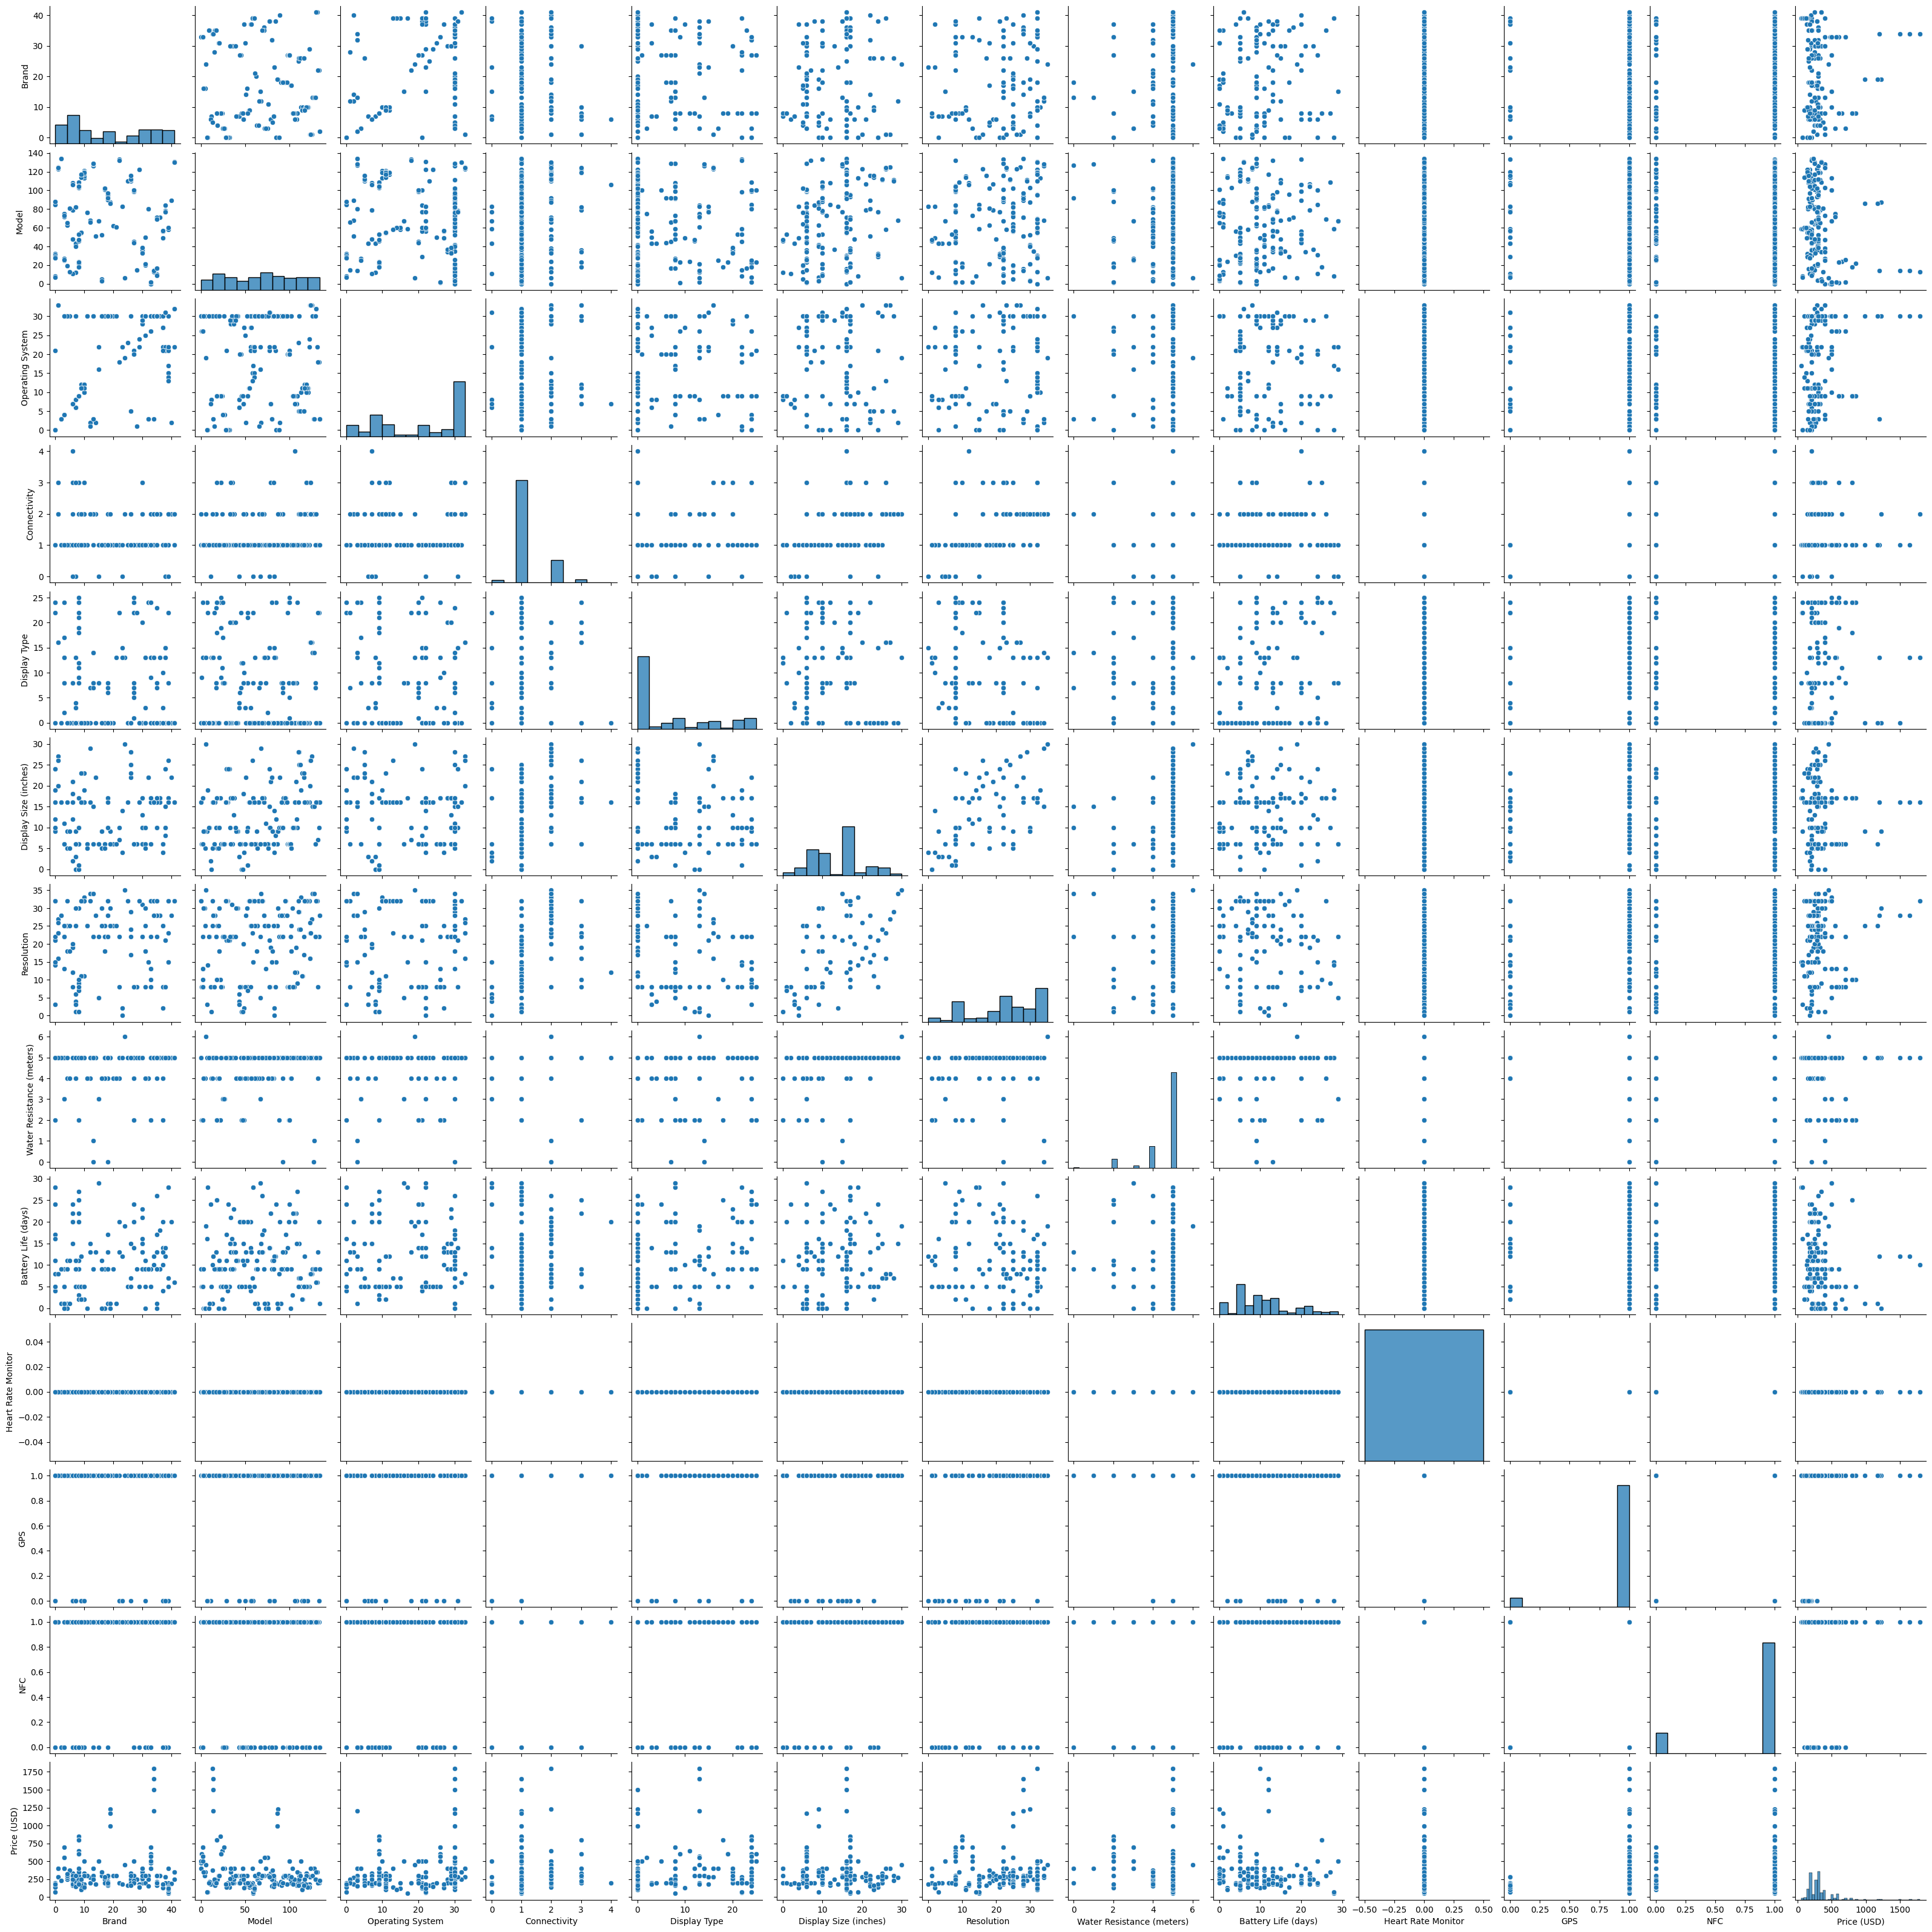

In [14]:
sns.pairplot(df2)

In [15]:
df2.drop('Heart Rate Monitor', axis=1, inplace=True)


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_encoded,y, test_size=0.2)

In [17]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [18]:
model.score(x_train, y_train)

0.9240664061974607

In [19]:
model.score(x_test, y_test)

0.8635865547383679

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_train_predict = model.predict(x_train)
mse=mean_squared_error(y_train, y_train_predict)
mae=mean_absolute_error(y_train, y_train_predict)
r2=r2_score(y_train, y_train_predict)
print('mean_squared_error', mse)
print('mean_absolute_error', mae)
print('r2_score', r2)

mean_squared_error 3131.5411397581033
mean_absolute_error 41.75313556745593
r2_score 0.9240664061974607


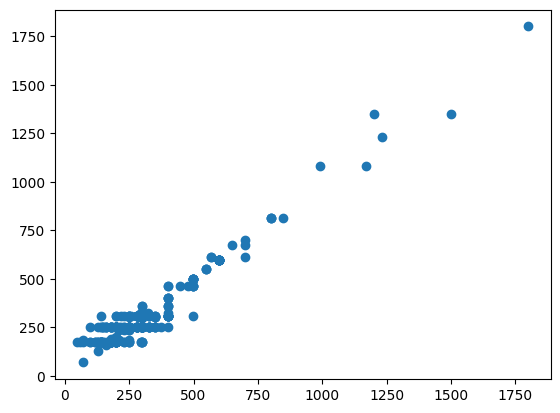

In [21]:
plt.scatter(y_train, y_train_predict)
plt.show()

mean_squared_error 5483.714909448157
mean_absolute_error 52.91313231459088
r2_score 0.8635865547383679


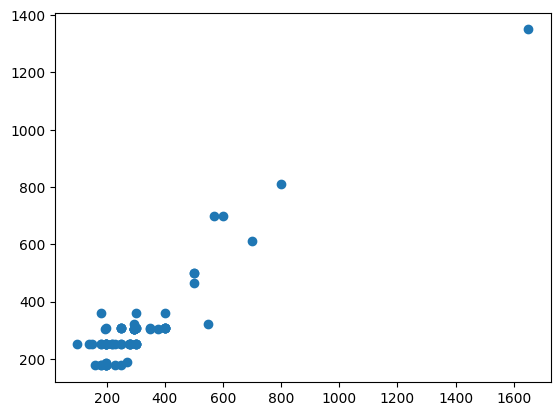

In [22]:
y_test_predict = model.predict(x_test)
mse=mean_squared_error(y_test, y_test_predict)
mae=mean_absolute_error(y_test, y_test_predict)
r2=r2_score(y_test, y_test_predict)
print('mean_squared_error', mse)
print('mean_absolute_error', mae)
print('r2_score', r2)

plt.scatter(y_test, y_test_predict)
# plt.scatter(, edgecolors=(0, 0, 1))
plt.show()